## Packages 

In [4]:
import pandas as pd
import seaborn as sns

## Open Data 

In [38]:
# Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_day_for_analysis.csv')
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

## Filtering from 2016

In [39]:
#select from 2016 to 2023
data_day = data_day[(data_day['year'] >= 2016)]

## N observers calculation

In [40]:
data_day.head(2)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,weather,windspeed_bfr,wind_ms,winddirection,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature
627,2016-07-15,2016,7,15,08:24:00,18:48:00,10.4,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,NaN,NaN,NaN,o,1.0,NaN,NaN,NaN,NaN,NaN
628,2016-07-15,2016,7,15,08:24:00,18:48:00,10.4,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,NaN,NaN,NaN,o,1.0,NaN,NaN,NaN,NaN,NaN


In [41]:
# Filter the DataFrame to keep only rows with NaN values in the 'observers' column
nan_observers = data_day[data_day['observerspresent'].isna()]

# Count the number of dates with NaN values in the 'observers' column
nan_observers_count = nan_observers['date_dt'].nunique()
print(nan_observers_count/data_day.date_dt.nunique()*100)

#print(data_day.date_dt.nunique())

32.01219512195122


In [42]:
 nan_observers['date_dt'].unique()

array(['2016-07-15', '2016-07-16', '2016-07-17', '2016-07-18',
       '2016-07-19', '2016-07-20', '2016-07-23', '2016-07-24',
       '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
       '2016-07-30', '2016-08-01', '2016-08-02', '2016-08-05',
       '2016-08-11', '2016-10-03', '2016-10-04', '2017-07-26',
       '2017-07-29', '2017-08-01', '2017-08-10', '2017-08-11',
       '2017-08-12', '2017-08-14', '2017-08-15', '2017-08-17',
       '2017-08-21', '2017-08-24', '2017-10-04', '2018-07-16',
       '2018-07-19', '2018-07-23', '2018-07-24', '2018-07-25',
       '2018-07-26', '2018-07-27', '2018-07-29', '2018-07-30',
       '2018-07-31', '2018-08-01', '2018-08-02', '2018-08-03',
       '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
       '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
       '2018-08-12', '2018-08-13', '2018-08-14', '2018-08-15',
       '2018-08-16', '2018-08-17', '2018-08-18', '2018-08-19',
       '2018-08-20', '2018-08-21', '2018-08-22', '2018-

In [43]:
# How many dates have no observers names?
nan_observers_dates = data_day[data_day['observers'].isna()]['date_dt'].unique()
len(nan_observers_dates)

6

In [44]:
# Delete rows that have dates in 'nan_observers_dates'
cleaned_data_day = data_day[~data_day['date_dt'].isin(nan_observers_dates)]

In [45]:
date_observors = cleaned_data_day[['date_dt','observers']].drop_duplicates()
date_observors

,date_dt,observers
627,2016-07-15,"margaux ruiz, lauriane de gail, Gabriel sauvé,..."
635,2016-07-16,"MR, QD"
642,2016-07-17,"MR, MC, CR, CB, QD"
649,2016-07-18,"MR, LDG, MC, Mijo Gariou"
657,2016-07-19,"MR, QD, LDG, GS"
...,...,...
12854,2023-10-23,"Sati BOULICOT, Guillaume AMIOT, Tristan FORT"
12877,2023-10-24,"Sati BOULICOT, Guillaume AMIOT, Tristan FORT, ..."
12901,2023-10-25,"Sati BOULICOT, Tiphaine CAUSSE, Tristan FORT, ..."
12923,2023-10-27,"Sati BOULICOT, Tristan FORT"


In [46]:
# Function to count unique names in a single cell
def count_unique_names(cell_value):
    # Split the cell value into a list of names
    names = [name.strip() for name in cell_value.split(',')]
    # Count unique names
    unique_names = set(names)
    return len(unique_names)

In [47]:
# Apply the function to the 'names' column
cleaned_data_day['n_observers'] = cleaned_data_day['observers'].apply(count_unique_names)


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_73015/3689962351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_day['n_observers'] = cleaned_data_day['observers'].apply(count_unique_names)


In [48]:
# Export cleaned_data_day (with n_observers)
cleaned_data_day.to_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv', index = False)


## Data preprocessing

In [49]:
cleaned_data_day.head(1)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,windspeed_bfr,wind_ms,winddirection,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers
627,2016-07-15,2016,7,15,08:24:00,18:48:00,10.4,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,NaN,NaN,o,1.0,NaN,NaN,NaN,NaN,NaN,7


In [70]:
# Abundance direction 1 / n_observers
cleaned_data_day['abundance_dir_1_per_observer'] = cleaned_data_day['direction1']/cleaned_data_day['n_observers']
cleaned_data_day['abundance_dir_2_per_observer'] = cleaned_data_day['direction2']/cleaned_data_day['n_observers']
cleaned_data_day['abundance_local_per_observer'] = cleaned_data_day['maxlocal']/cleaned_data_day['n_observers']

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_73015/1999206835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_day['abundance_dir_1_per_observer'] = cleaned_data_day['direction1']/cleaned_data_day['n_observers']
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_73015/1999206835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_day['abundance_dir_2_per_observer'] = cleaned_data_day['direction2']/cleaned_data_day['n_observers']
/var/folders/p7/90k2qrqs4fvb

In [71]:
cleaned_data_day[['date_dt', 'species', 'direction1', 'maxlocal' , 'n_observers', 'abundance_dir_1_per_observer', 'abundance_dir_2_per_observer', 'abundance_local_per_observer']].head(2)

,date_dt,species,direction1,maxlocal,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
627,2016-07-15,Faucon crécerelle,0.0,2.0,7,0.000000,0.0,0.285714
628,2016-07-15,laridé spec.,1.0,0.0,7,0.142857,0.0,0.000000


In [72]:
# Export data_day table (for analysis) to csv in the folder 'tableaux_finaux' (you to create this folder manually before)
cleaned_data_day.to_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv', index = False)

## Species selection for analysis (based on abundance, only migration data)

### A) Absolute Abundance

In [78]:
data_day = data_day.loc[data_day['direction1'] > 0]

In [85]:
# Calculate mean abundance per species per year
abundance_per_species_and_year = data_day.groupby(['species', 'year'])['direction1'].sum().reset_index()

# Sort by year and mean abundance
abundance_per_species_and_year = abundance_per_species_and_year.sort_values(by=['year', 'direction1'], ascending=[True, False])

# Get top 5 species per year
top_3_species_per_year = abundance_per_species_and_year.groupby('year').head(3).reset_index(drop=True)
top_5_species_per_year = abundance_per_species_and_year.groupby('year').head(5).reset_index(drop=True)

# Display the result
print(top_3_species_per_year)

                  species  year  direction1
0              Milan noir  2016     45054.0
1         Bondrée apivore  2016      4517.0
2   Hirondelle de fenêtre  2016      1436.0
3              Milan noir  2017     45921.0
4           Martinet noir  2017      8513.0
5         Bondrée apivore  2017      4920.0
6              Milan noir  2018     47936.0
7         Bondrée apivore  2018      6232.0
8           Martinet noir  2018      2636.0
9              Milan noir  2019     57842.0
10        Bondrée apivore  2019      5546.0
11            Milan royal  2019      2035.0
12             Milan noir  2020     67111.0
13        Bondrée apivore  2020      5229.0
14            Milan royal  2020      1772.0
15          Martinet noir  2021     60718.0
16             Milan noir  2021     59025.0
17    Hirondelle rustique  2021     18927.0
18          Martinet noir  2022     73224.0
19             Milan noir  2022     53369.0
20  Hirondelle de fenêtre  2022     31264.0
21             Milan noir  2023 

In [86]:
top_3_species_per_year.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Hirondelle de fenêtre',
       'Martinet noir', 'Milan royal', 'Hirondelle rustique'],
      dtype=object)

In [90]:
top_5_species_per_year

,species,year,direction1
0,Milan noir,2016,45054.0
1,Bondrée apivore,2016,4517.0
2,Hirondelle de fenêtre,2016,1436.0
3,Milan royal,2016,680.0
4,Hirondelle rustique,2016,662.0
5,Milan noir,2017,45921.0
6,Martinet noir,2017,8513.0
7,Bondrée apivore,2017,4920.0
8,Hirondelle rustique,2017,3815.0
9,Milan royal,2017,3008.0


In [89]:
top_5_species_per_year.species.unique()

array(['Milan noir', 'Bondrée apivore', 'Hirondelle de fenêtre',
       'Milan royal', 'Hirondelle rustique', 'Martinet noir',
       'Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire',
       'Pigeon ramier', 'hirondelle spec.'], dtype=object)

In [82]:
top_3_species_per_year.head()

,species,year,direction1
0,Milan noir,2016,45054.0
1,Bondrée apivore,2016,4517.0
2,Hirondelle de fenêtre,2016,1436.0
3,Milan noir,2017,45921.0
4,Martinet noir,2017,8513.0


<AxesSubplot:xlabel='year', ylabel='direction1'>

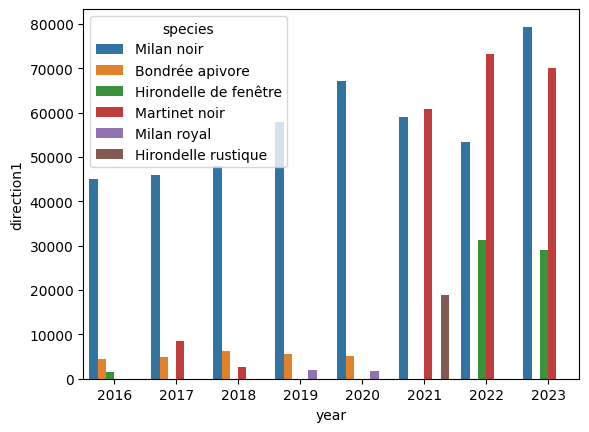

In [83]:
sns.barplot(data=top_3_species_per_year, x='year', y='direction1', hue='species')

### B) Relative Abundance

In [60]:
# Calculate mean abundance per species per year
abundance_per_species_and_year = cleaned_data_day.groupby(['species', 'year'])['abundance_dir_1_per_observer'].mean().reset_index()

# Sort by year and mean abundance
abundance_per_species_and_year = abundance_per_species_and_year.sort_values(by=['year', 'abundance_dir_1_per_observer'], ascending=[True, False])

# Get top 5 species per year
top_3_species_per_year = abundance_per_species_and_year.groupby('year').head(3).reset_index(drop=True)
top_5_species_per_year = abundance_per_species_and_year.groupby('year').head(5).reset_index(drop=True)

# Display the result
print(top_5_species_per_year)

                    species  year  abundance_dir_1_per_observer
0                Milan noir  2016                    153.488492
1           Bondrée apivore  2016                     14.309734
2     Hirondelle de fenêtre  2016                      8.294869
3            Grand Cormoran  2016                      6.535476
4               Milan royal  2016                      6.317141
5                Milan noir  2017                     98.597852
6             Martinet noir  2017                     51.462312
7             Pigeon ramier  2017                     42.000000
8       Hirondelle rustique  2017                     19.167985
9               Milan royal  2017                     14.541348
10               Milan noir  2018                    129.365548
11            Martinet noir  2018                     96.800974
12          Bondrée apivore  2018                     22.391049
13              Milan royal  2018                     12.446510
14          Cigogne blanche  2018       

<AxesSubplot:xlabel='year', ylabel='abundance_dir_1_per_observer'>

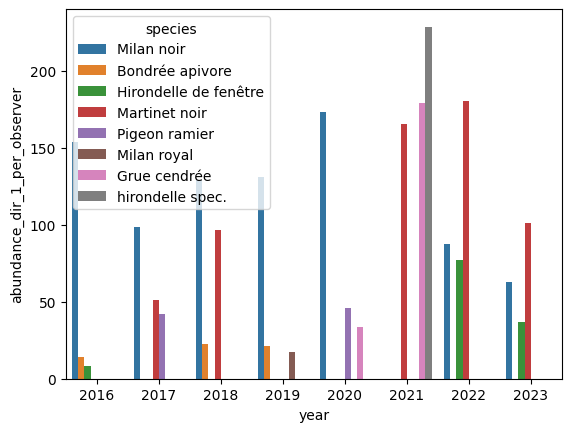

In [61]:
sns.barplot(data=top_3_species_per_year, x='year', y='abundance_dir_1_per_observer', hue='species')

### C) Species list: Milan noir, Bondrée apivore, Milan royal = data_day_milan_noir_bondree_milan_royal

In [66]:
# Filter for specific species
data_day_milan_noir_bondree_milan_royal = cleaned_data_day[cleaned_data_day['species'].isin( ['Milan noir', 'Bondrée apivore', 'Milan royal'])]
data_day_milan_noir_bondree_milan_royal = data_day_milan_noir_bondree_milan_royal.loc[data_day_milan_noir_bondree_milan_royal['direction1'] > 0]

In [68]:
data_day_milan_noir_bondree_milan_royal.head()

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
631,2016-07-15,2016,7,15,08:24:00,18:48:00,10.400000,"margaux ruiz, lauriane de gail, Gabriel sauvé,...",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,7,61.857143,0.0,0.142857
636,2016-07-16,2016,7,16,08:24:00,17:00:00,8.600000,"MR, QD",2.0,NaN,...,0.0,NaN,NaN,NaN,1000.0,13.0,2,188.000000,0.0,0.000000
642,2016-07-17,2016,7,17,06:23:00,16:13:00,9.833333,"MR, MC, CR, CB, QD",2.0,NaN,...,0.0,NaN,NaN,NaN,10000.0,15.0,5,17.600000,0.0,0.000000
655,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,1.0,NaN,NaN,NaN,10000.0,21.0,4,47.000000,0.0,0.000000
662,2016-07-19,2016,7,19,06:36:00,16:47:00,10.183333,"MR, QD, LDG, GS",4.0,NaN,...,2.0,NaN,NaN,NaN,12000.0,34.0,4,42.500000,0.0,0.000000


In [69]:
# Export data_day table (for analysis) to csv in the folder 'tableaux_finaux' (you to create this folder manually before)
data_day_milan_noir_bondree_milan_royal.to_csv('../raw_data/Trektellen/tableaux_finaux/data_day_milan_noir_bondree_milan_royal.csv', index = False)